# Theoretical Questions:

### 1. **What does R-squared represent in a regression model?**
R-squared, or the coefficient of determination, measures the proportion of variance in the dependent variable that can be explained by the independent variables in a regression model. It ranges from 0 to 1, where:
- **0**: No explanatory power.
- **1**: Perfect explanatory power.  

---

### 2. **What are the assumptions of linear regression?**
Linear regression assumes:
1. **Linearity**: The relationship between independent and dependent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of the independent variable.
4. **Normality**: Residuals follow a normal distribution.
5. **No Multicollinearity**: Independent variables should not be highly correlated.  

---

### 3. **What is the difference between R-squared and Adjusted R-squared?**
- **R-squared**: Indicates the proportion of variance explained by the model but does not account for the number of predictors.
- **Adjusted R-squared**: Adjusts R-squared to account for the number of predictors, penalizing for adding irrelevant variables that don’t improve the model.  

---

### 4. **Why do we use Mean Squared Error (MSE)?**
MSE is used to measure the average squared difference between predicted and actual values. It:
- Penalizes larger errors more than smaller ones.
- Provides a clear objective for optimization in regression models.

---

### 5. **What does an Adjusted R-squared value of 0.85 indicate?**
An Adjusted R-squared value of 0.85 means 85% of the variability in the dependent variable is explained by the model, accounting for the number of predictors and penalizing for overfitting.  

---

### 6. **How do we check for normality of residuals in linear regression?**
You can check normality using:
1. **Histogram of residuals**: Should be bell-shaped.
2. **Q-Q Plot**: Points should lie on a straight line.
3. **Statistical tests**: Shapiro-Wilk or Kolmogorov-Smirnov tests.

---

### 7. **What is multicollinearity, and how does it impact regression?**
Multicollinearity occurs when independent variables are highly correlated. It:
- Makes coefficient estimates unstable.
- Increases standard errors, reducing the significance of predictors.

---

### 8. **What is Mean Absolute Error (MAE)?**
MAE is the average of absolute differences between predicted and actual values. It’s less sensitive to outliers than MSE. Formula:
\[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\]

---

### 9. **What are the benefits of using an ML pipeline?**
An ML pipeline automates workflows, ensuring:
1. **Reproducibility**: Consistent results with standardized steps.
2. **Scalability**: Handles large datasets.
3. **Modularity**: Components like preprocessing, model training, and evaluation can be reused.

---

### 10. **Why is RMSE considered more interpretable than MSE?**
RMSE is the square root of MSE, keeping units the same as the dependent variable, making it easier to interpret in real-world terms.

---

### 11. **What is pickling in Python, and how is it useful in ML?**
Pickling serializes Python objects into a binary format for storage or transfer. In ML, it's used to save:
- Trained models for reuse.
- Preprocessed data pipelines.

---

### 12. **What does a high R-squared value mean?**
A high R-squared value (close to 1) indicates that the model explains most of the variability in the dependent variable. However, it doesn’t guarantee good predictions or that the model isn’t overfitting.

---

### 13. **What happens if linear regression assumptions are violated?**
Violations can lead to:
- **Biased coefficients**: Results are not reliable.
- **Inefficient estimates**: Predictions have higher errors.
- **Misleading interpretations**: False conclusions about relationships.

---

### 14. **How can we address multicollinearity in regression?**
1. Remove highly correlated predictors.
2. Use **Principal Component Analysis (PCA)**.
3. Regularization techniques like **Ridge Regression**.

---

### 15. **How can feature selection improve model performance in regression analysis?**
Feature selection:
1. Reduces overfitting by removing irrelevant predictors.
2. Improves model interpretability.
3. Enhances computational efficiency.

---

### 16. **How is Adjusted R-squared calculated?**
The formula:
\[
\text{Adjusted R}^2 = 1 - \left(1 - R^2\right) \frac{n - 1}{n - p - 1}
\]
Where:
- \(n\): Number of observations.
- \(p\): Number of predictors.

---

### 17. **Why is MSE sensitive to outliers?**
MSE squares the error, amplifying the impact of large residuals (outliers), which can dominate the loss function.

---

### 18. **What is the role of homoscedasticity in linear regression?**
Homoscedasticity ensures constant variance of residuals, which is critical for:
- Unbiased estimates.
- Reliable hypothesis tests.

---

### 19. **What is Root Mean Squared Error (RMSE)?**
RMSE measures the square root of the average squared differences between actual and predicted values.
---

### 20. **Why is pickling considered risky?**
Pickling is risky because:
1. It can execute malicious code if the file is tampered with.
2. It is Python-specific, making it less portable.

---

### 21. **What alternatives exist to pickling for saving ML models?**
1. **Joblib**: Optimized for large arrays.
2. **ONNX**: A portable and framework-agnostic format.
3. **JSON/CSV**: For model parameters only.

---

### 22. **What is heteroscedasticity, and why is it a problem?**
Heteroscedasticity occurs when residual variance is not constant. It:
1. Violates regression assumptions.
2. Leads to inefficient estimates and unreliable confidence intervals.

---

### 23. **How can interaction terms enhance a regression model's predictive power?**
Interaction terms capture combined effects of two variables, revealing relationships not evident in individual predictors.

---



# Practical Questions:



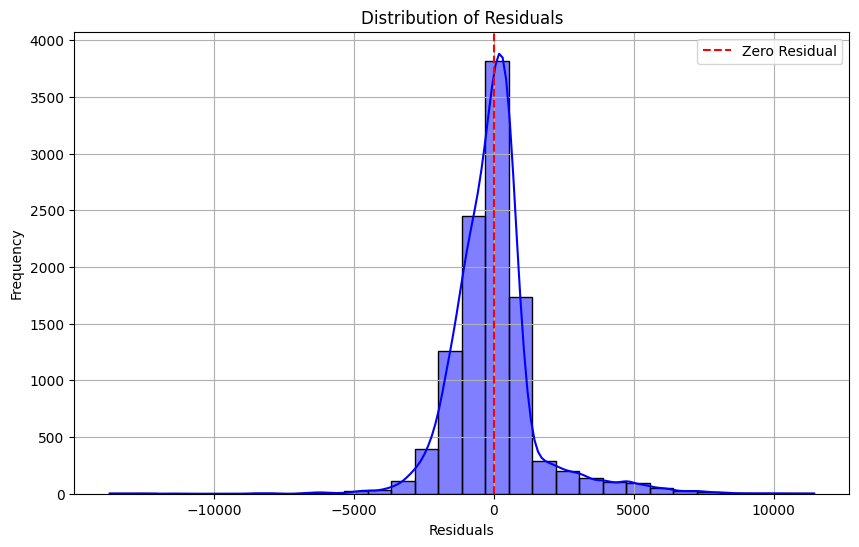

Mean Squared Error (MSE): 2333883.18


In [1]:
#1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select relevant features and target variable
# We'll use 'carat', 'depth', and 'table' as predictors for 'price'
features = ["carat", "depth", "table"]
X = diamonds[features]
y = diamonds["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize the residuals
def plot_residuals(residuals):
    plt.figure(figsize=(10, 6))

    # Plot the residuals distribution
    sns.histplot(residuals, kde=True, color="blue", bins=30)
    plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
    plt.title("Distribution of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot residuals
plot_residuals(residuals)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


In [3]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select relevant features and target variable
# We'll use 'carat', 'depth', and 'table' as predictors for 'price'
features = ["carat", "depth", "table"]
X = diamonds[features]
y = diamonds["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 2333883.18
Mean Absolute Error (MAE): 994.74
Root Mean Squared Error (RMSE): 1527.71


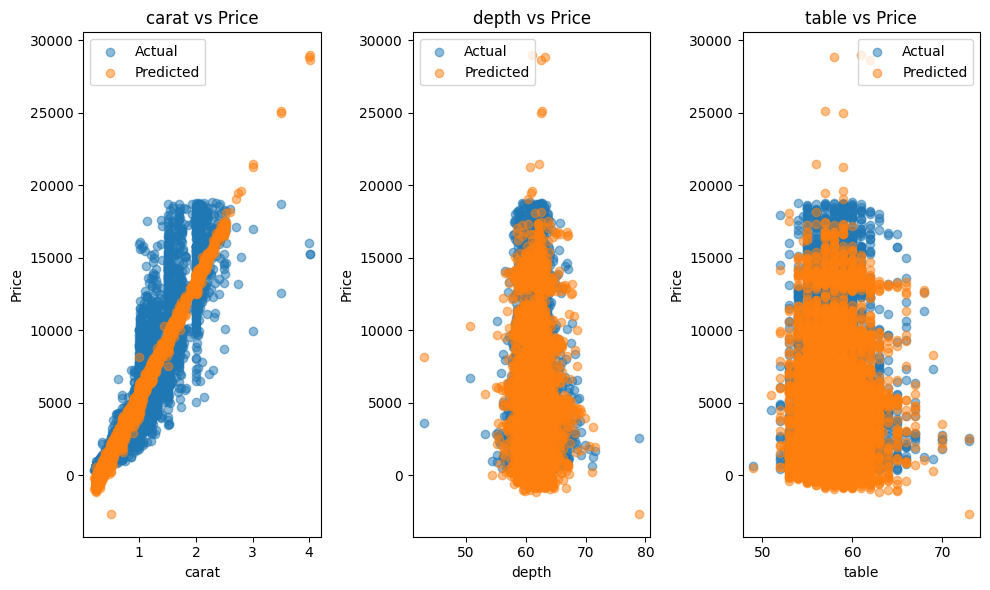

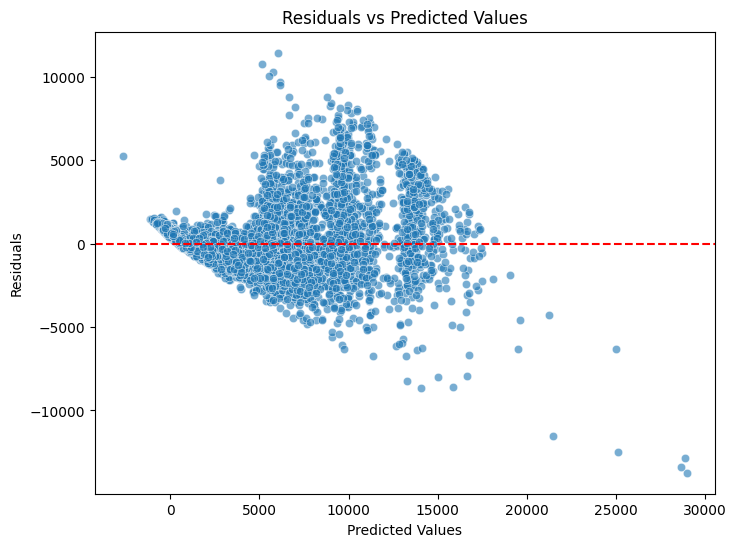

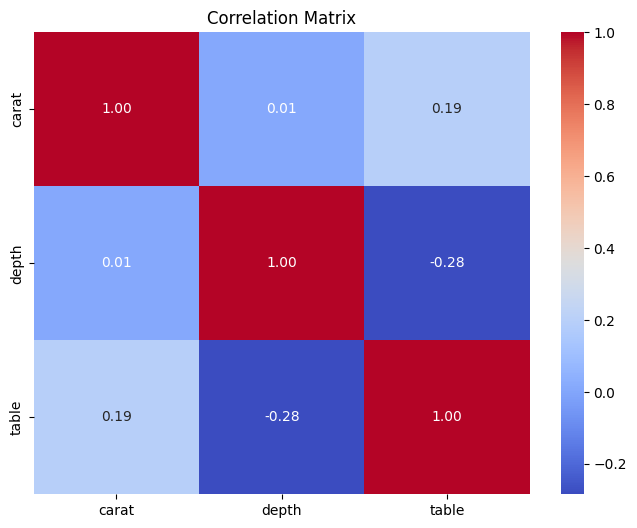

In [4]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select relevant features and target variable
features = ["carat", "depth", "table"]
X = diamonds[features]
y = diamonds["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Function to check linear regression assumptions
def check_linear_regression_assumptions(X, y, y_pred, residuals):
    # 1. Linearity
    plt.figure(figsize=(10, 6))
    for i, feature in enumerate(X.columns):
        plt.subplot(1, len(X.columns), i + 1)
        plt.scatter(X[feature], y, alpha=0.5, label="Actual")
        plt.scatter(X[feature], y_pred, alpha=0.5, label="Predicted")
        plt.title(f"{feature} vs Price")
        plt.xlabel(feature)
        plt.ylabel("Price")
        plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Homoscedasticity (constant variance)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.title("Residuals vs Predicted Values")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    # 3. Multicollinearity
    corr_matrix = X.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Check assumptions
check_linear_regression_assumptions(X_test, y_test, y_pred, residuals)


In [5]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select relevant features and target variable
features = ["carat", "depth", "table"]
X = diamonds[features]
y = diamonds["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Iterate through each model, create a pipeline, and evaluate performance
for model_name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="r2")
    print(f"{model_name}:\n  Mean R^2: {np.mean(scores):.4f}\n  Standard Deviation: {np.std(scores):.4f}\n")


Linear Regression:
  Mean R^2: 0.8537
  Standard Deviation: 0.0032

Ridge Regression:
  Mean R^2: 0.8537
  Standard Deviation: 0.0032

Lasso Regression:
  Mean R^2: 0.8537
  Standard Deviation: 0.0032

Random Forest:
  Mean R^2: 0.8708
  Standard Deviation: 0.0020



In [6]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select one feature ('carat') for simple linear regression and the target variable ('price')
X = diamonds[["carat"]]  # Independent variable
y = diamonds["price"]    # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print model coefficients, intercept, and R-squared score
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2:.4f}")




Coefficient: 7768.91
Intercept: -2261.91
R-squared Score: 0.8489


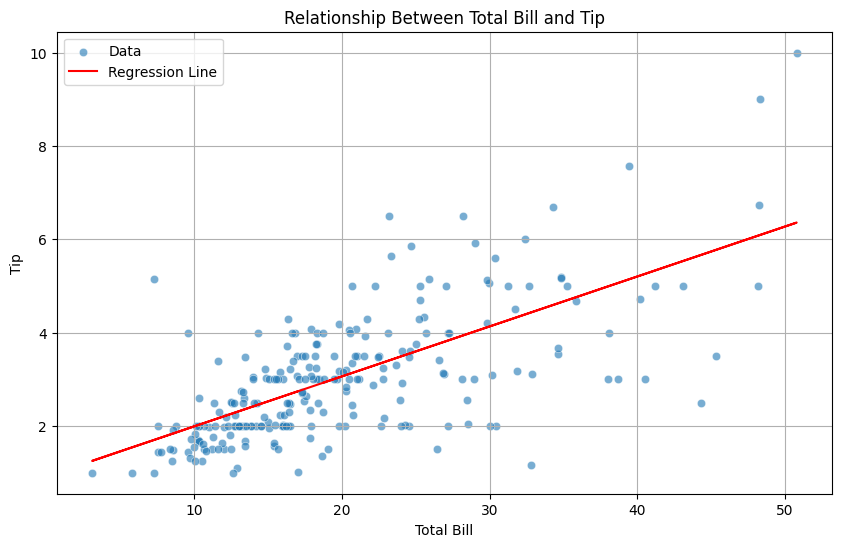

Model Equation: Tip = 0.11 * Total Bill + 0.93
R-squared Score: 0.5449


In [1]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Select the 'total_bill' as the independent variable and 'tip' as the dependent variable
X = tips[["total_bill"]]
y = tips["tip"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model's coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Plot the data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips["total_bill"], y=tips["tip"], alpha=0.6, label="Data")
plt.plot(tips["total_bill"], model.predict(tips[["total_bill"]]), color="red", label="Regression Line")
plt.title("Relationship Between Total Bill and Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.grid(True)
plt.show()

# Print the model's equation and R-squared score
r2_score = model.score(X_test, y_test)
print(f"Model Equation: Tip = {coefficient:.2f} * Total Bill + {intercept:.2f}")
print(f"R-squared Score: {r2_score:.4f}")


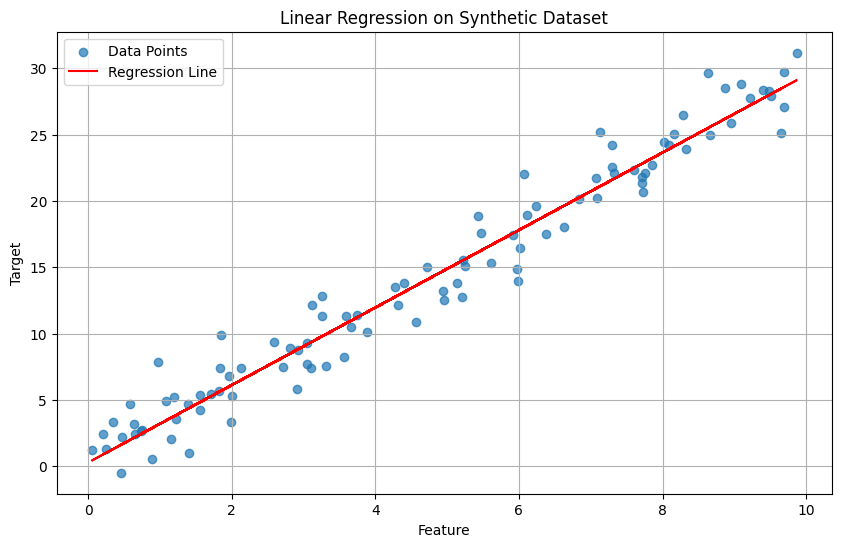

Model Coefficient (Slope): 2.92
Model Intercept: 0.29


In [2]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature with values between 0 and 10
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict new values
y_pred = model.predict(X_test)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression on Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Print the model's coefficient and intercept
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


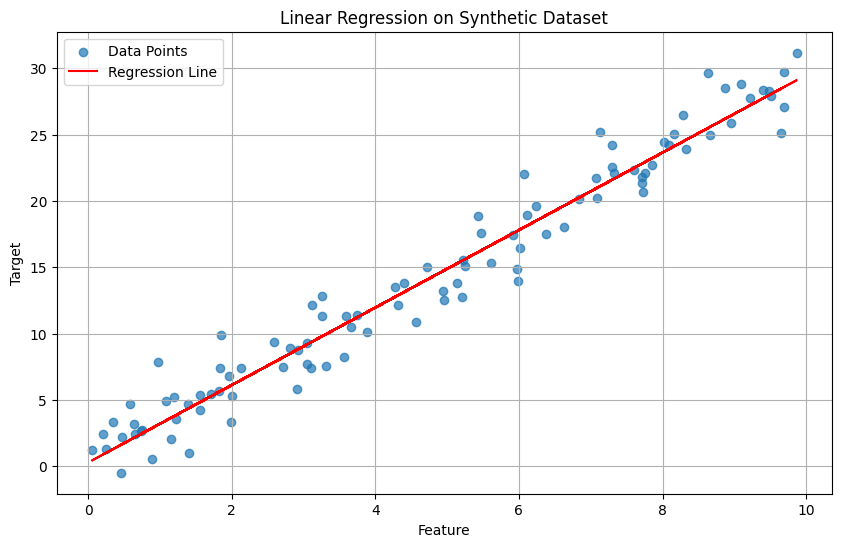

Model Coefficient (Slope): 2.92
Model Intercept: 0.29


In [3]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.

import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature with values between 0 and 10
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict new values
y_pred = model.predict(X_test)

# Save the trained model to a file using pickle
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression on Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Print the model's coefficient and intercept
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


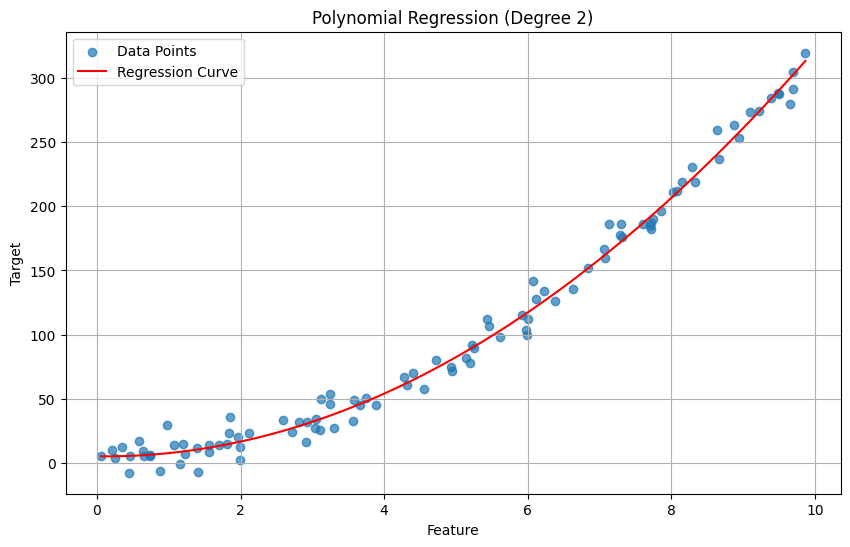

Model Coefficients: [ 0.         -0.76433741  3.24214404]
Model Intercept: 5.13


In [4]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature with values between 0 and 10
y = 3 * X.squeeze()**2 + 2 * X.squeeze() + np.random.randn(100) * 10  # Quadratic relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict new values
y_pred = model.predict(X_test_poly)

# Plot the data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")

# Generate a smooth curve for the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)
plt.plot(X_curve, y_curve, color="red", label="Regression Curve")

plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_:.2f}")


Simple Linear Regression Model Coefficient (Slope): 4.80
Simple Linear Regression Model Intercept: 0.71


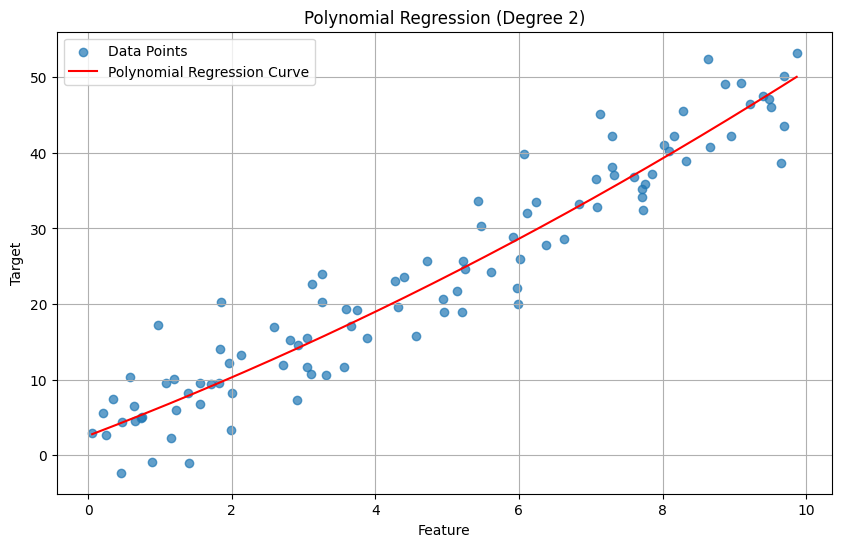

Polynomial Regression Model Coefficients: [0.         3.61783129 0.12107202]
Polynomial Regression Model Intercept: 2.57


In [5]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data for simple linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature with values between 0 and 10
y = 5 * X.squeeze() + np.random.randn(100) * 5  # Linear relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Print the model's coefficient and intercept
print(f"Simple Linear Regression Model Coefficient (Slope): {simple_model.coef_[0]:.2f}")
print(f"Simple Linear Regression Model Intercept: {simple_model.intercept_:.2f}")

# Transform the features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a polynomial regression model to the transformed features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict new values
y_pred = poly_model.predict(X_test_poly)

# Plot the data points and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")

# Generate a smooth curve for the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = poly_model.predict(X_curve_poly)
plt.plot(X_curve, y_curve, color="red", label="Polynomial Regression Curve")

plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial model's coefficients and intercept
print(f"Polynomial Regression Model Coefficients: {poly_model.coef_}")
print(f"Polynomial Regression Model Intercept: {poly_model.intercept_:.2f}")


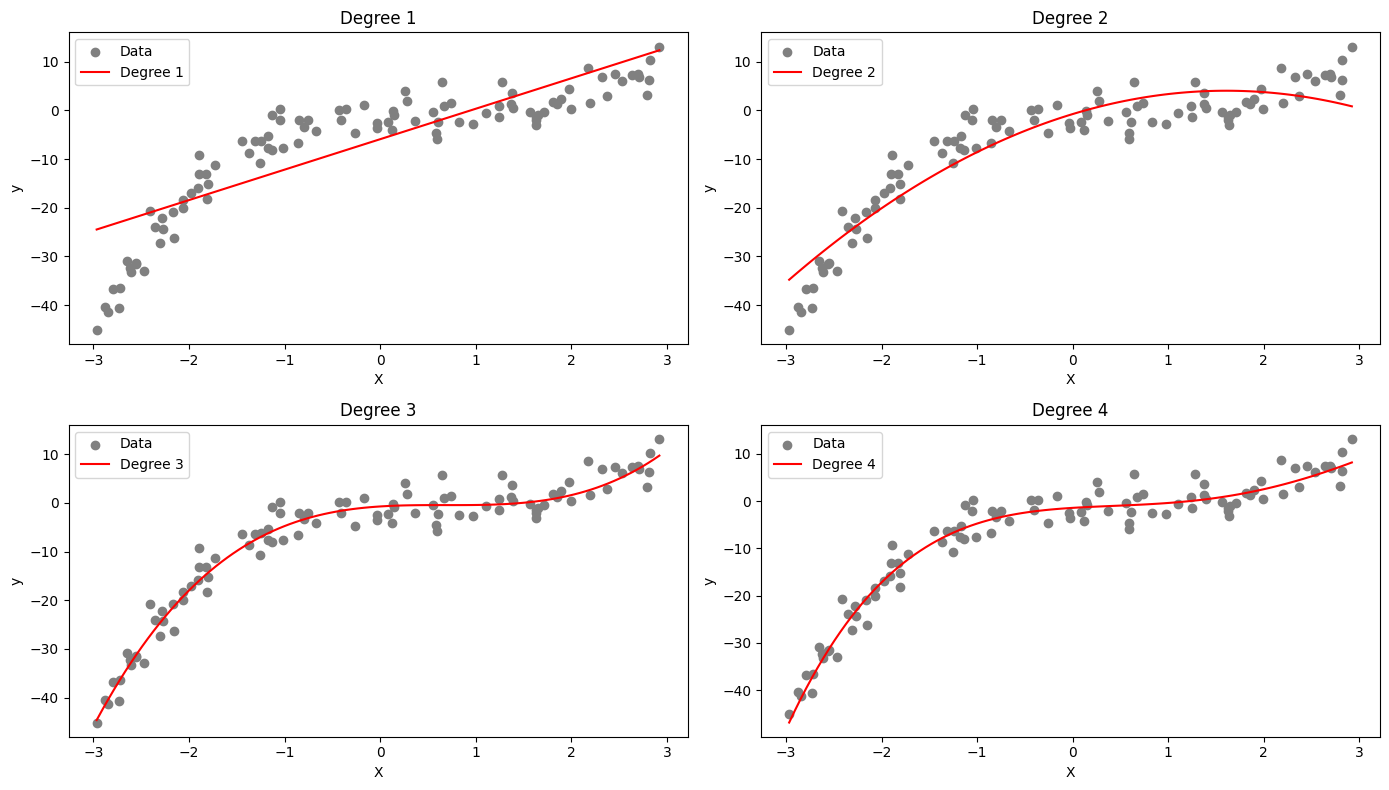

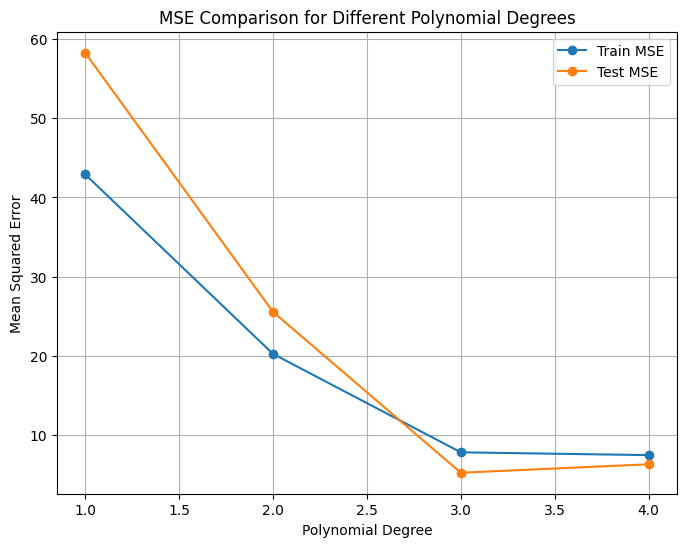

In [10]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.uniform(-3, 3, 100).reshape(-1, 1)  # Feature

# True function with noise
y_true = (X**3 - 2*X**2 + X).ravel() + np.random.normal(0, 3, size=X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

# Step 2: Fit polynomial regression models of varying degrees
degrees = [1, 2, 3, 4]  # Adjusted to have 4 degrees to avoid subplot error
mse_train = []
mse_test = []

for degree in degrees:
    # Transform features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Compute Mean Squared Error
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Step 3: Visualize results
plt.figure(figsize=(14, 8))

# Plot original data and models for different degrees
for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y_true, color="gray", label="Data")

    # Generate fine grid for smooth curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = PolynomialFeatures(degree=degree).fit_transform(X_range)
    model = LinearRegression().fit(PolynomialFeatures(degree=degree).fit_transform(X_train), y_train)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree}")
    plt.title(f"Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()

# Plot MSE comparison
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_train, label="Train MSE", marker="o")
plt.plot(degrees, mse_test, label="Test MSE", marker="o")
plt.title("MSE Comparison for Different Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.show()


In [11]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # Two features
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.normal(0, 0.5, 100)  # Linear relationship with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Get model details
coefficients = model.coef_  # Coefficients of the features
intercept = model.intercept_  # Intercept of the model

# Step 4: Predict and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print results
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)
print("R-squared Score:", r2)


Model Coefficients: [3.09818541 5.40320667]
Model Intercept: -0.21957327863035525
R-squared Score: 0.9070235487040409


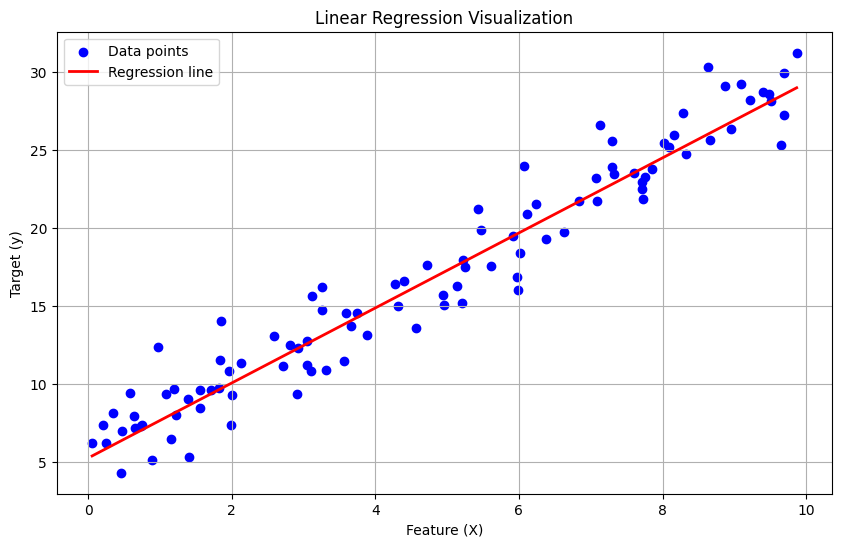

In [12]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature, values between 0 and 10
y = 2.5 * X.flatten() + 5 + np.random.normal(0, 2, 100)  # Linear relationship with noise

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict values for visualization
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate range for the regression line
y_range_pred = model.predict(X_range)

# Step 5: Visualize the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Regression line")
plt.title("Linear Regression Visualization")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid()
plt.show()

In [13]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Generate synthetic dataset
np.random.seed(42)
data = {
    'Feature_1': np.random.rand(100) * 10,
    'Feature_2': np.random.rand(100) * 20,
    'Feature_3': np.random.rand(100) * 30
}
df = pd.DataFrame(data)

# Introduce multicollinearity by making Feature_3 highly correlated with Feature_1 and Feature_2
df['Feature_3'] = 0.5 * df['Feature_1'] + 0.3 * df['Feature_2'] + np.random.normal(0, 0.1, size=100)

# Step 2: Calculate VIF for each feature
X = df.values  # Convert DataFrame to numpy array
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Step 3: Print VIF results
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
     Feature          VIF
0  Feature_1   827.905949
1  Feature_2  1271.639871
2  Feature_3  3572.945221


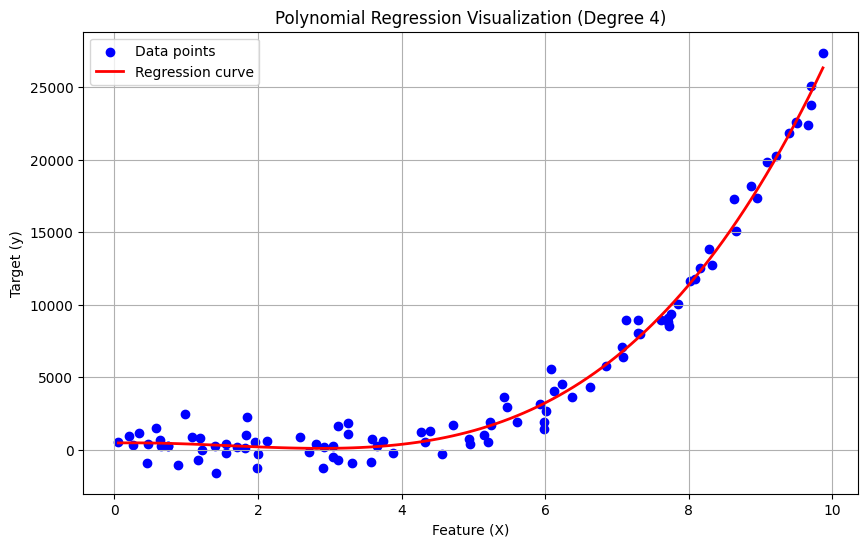

In [14]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # One feature, values between 0 and 10
y = 3 * X**4 - 2 * X**3 + X**2 - 5 * X + 7 + np.random.normal(0, 1000, size=(100, 1))

y = y.flatten()  # Flatten target array

# Step 2: Transform features for polynomial regression
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Step 3: Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Generate predictions for visualization
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Range for the regression curve
X_range_poly = poly_features.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Step 5: Visualize the data points and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Regression curve")
plt.title("Polynomial Regression Visualization (Degree 4)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid()
plt.show()


In [15]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # Three features
y = 4 * X[:, 0] + 2 * X[:, 1] - 3 * X[:, 2] + np.random.normal(0, 2, 100)  # Linear relationship with noise

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 3.1: Standardize the features
    ('regressor', LinearRegression())  # Step 3.2: Apply multiple linear regression
])

# Step 4: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 5: Predict and calculate R-squared score
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 6: Print the R-squared score
print("R-squared Score:", r2)


R-squared Score: 0.9783372281983522


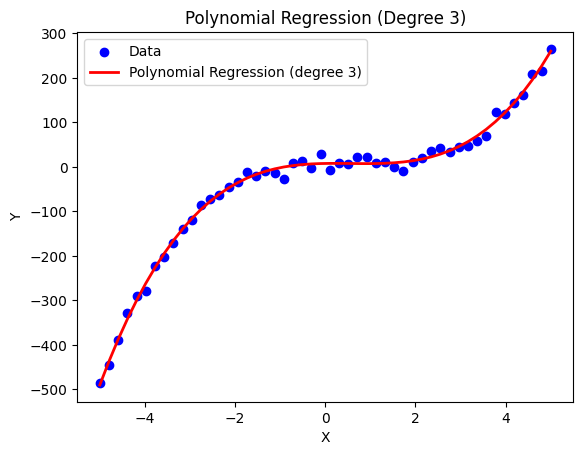

Mean Squared Error: 107.11


In [16]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(0)
x = np.linspace(-5, 5, 50)
y = 3*x**3 - 5*x**2 + 2*x + 7 + np.random.normal(0, 10, size=len(x))

# Reshape x for sklearn
x = x.reshape(-1, 1)

# Perform polynomial regression (degree 3)
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Predict values
y_pred = model.predict(x_poly)

# Plot results
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Polynomial Regression (degree 3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

# Print mean squared error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')



R-squared Score: 0.54
Model Coefficients: [ 3.48864146 -2.61854399  5.31869087  1.69627014 -1.60872197]


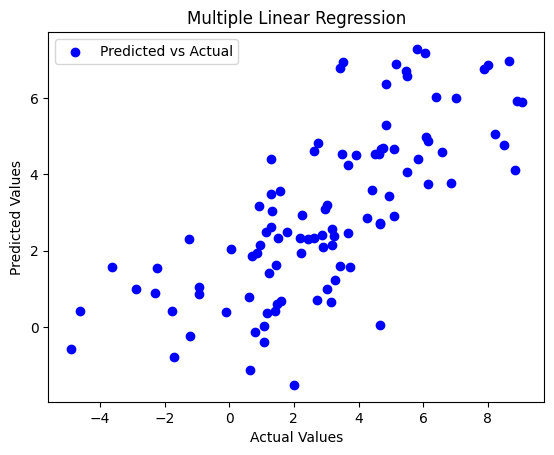

Mean Squared Error: 4.11


In [17]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 5)
true_coeffs = np.array([3.5, -2.1, 4.3, 1.7, -0.9])
y = X.dot(true_coeffs) + np.random.normal(0, 2, size=100)

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Print R-squared score and model coefficients
r_squared = r2_score(y, y_pred)
print(f'R-squared Score: {r_squared:.2f}')
print('Model Coefficients:', model.coef_)

# Plot results
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

# Print mean squared error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


R-squared Score: 0.75
Model Coefficients: 2.968467510701019 Intercept: 4.222151077447231


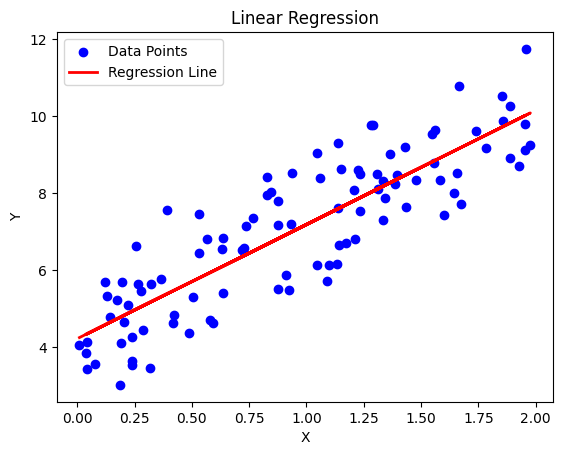

Mean Squared Error: 0.99


In [20]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.normal(0, 1, size=100)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Print R-squared score and model coefficients
r_squared = r2_score(y, y_pred)
print(f'R-squared Score: {r_squared:.2f}')
print('Model Coefficients:', model.coef_[0], 'Intercept:', model.intercept_)

# Plot results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print mean squared error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


R-squared Score: 0.72
Model Coefficients: [ 2.09132477 -1.72004337  4.05323099]
Intercept: -0.04978609753164287


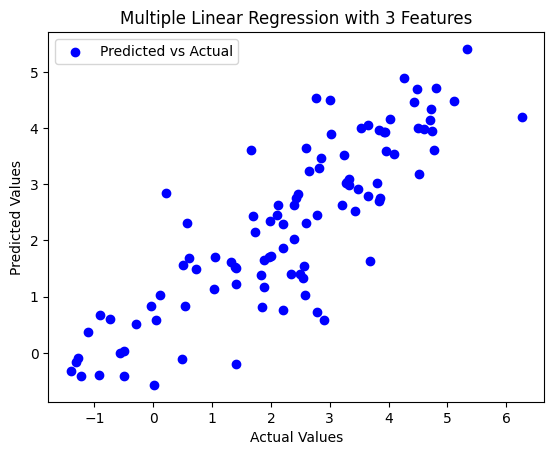

Mean Squared Error: 0.86


In [21]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset with 3 features
np.random.seed(0)
X = np.random.rand(100, 3)
true_coeffs = np.array([2.5, -1.7, 3.8])
y = X.dot(true_coeffs) + np.random.normal(0, 1, size=100)

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Print R-squared score and model coefficients
r_squared = r2_score(y, y_pred)
print(f'R-squared Score: {r_squared:.2f}')
print('Model Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Plot actual vs predicted values
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression with 3 Features')
plt.legend()
plt.show()

# Print mean squared error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


In [22]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import joblib

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Serialize the trained model using joblib
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved successfully!")

# Deserialize the model
loaded_model = joblib.load('linear_regression_model.pkl')
print("Model loaded successfully!")

# Make predictions using the loaded model
sample_data = np.array([[1.5, 2.0]])
prediction = loaded_model.predict(sample_data)
print(f'Prediction for input {sample_data}: {prediction}')



Model saved successfully!
Model loaded successfully!
Prediction for input [[1.5 2. ]]: [279.73662486]


In [24]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Load the Seaborn 'tips' dataset
data = sns.load_dataset('tips')

# Select features and target
X = data[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = data['tip']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Print mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Model Coefficients: [ 0.09469974  0.23348393 -0.02881928  0.19235325  0.17972098 -0.00606432
  0.12892759 -0.09495716]
Intercept: 0.4791179104407939
Mean Squared Error: 0.70


In [26]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + np.random.normal(0, 0.5, size=100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict values
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Print R-squared score and model coefficients
print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression R-squared:", r2_score(y_test, linear_pred))

print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression R-squared:", r2_score(y_test, ridge_pred))

# Print mean squared error
print(f'Linear Regression MSE: {mean_squared_error(y_test, linear_pred):.2f}')
print(f'Ridge Regression MSE: {mean_squared_error(y_test, ridge_pred):.2f}')


Linear Regression Coefficients: [ 2.82647934  1.88303834 -1.17604835  0.0727923  -0.22282008]
Linear Regression R-squared: 0.7646006937506331
Ridge Regression Coefficients: [ 2.47277823  1.61733934 -1.06388879  0.11157121 -0.24017491]
Ridge Regression R-squared: 0.7491077252711038
Linear Regression MSE: 0.24
Ridge Regression MSE: 0.26


In [27]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

# Import required libraries
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Initialize a Linear Regression model
model = LinearRegression()

# Perform cross-validation (using 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Output the results
print("Cross-validation scores (Negative Mean Squared Error):", cv_scores)
print("Mean of cross-validation scores:", cv_scores.mean())


Cross-validation scores (Negative Mean Squared Error): [-0.00780395 -0.01771422 -0.01275039 -0.01116348 -0.00978431]
Mean of cross-validation scores: -0.01184326821433752


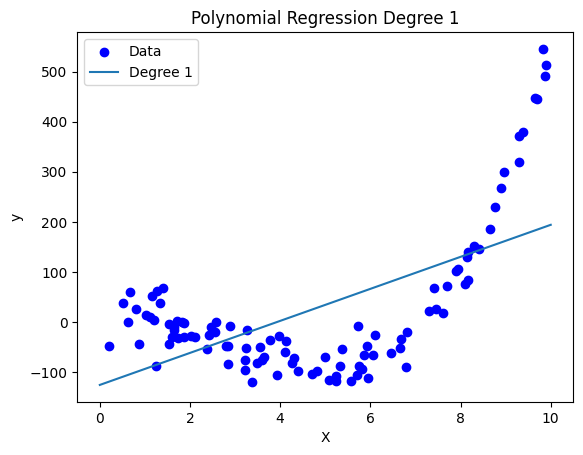

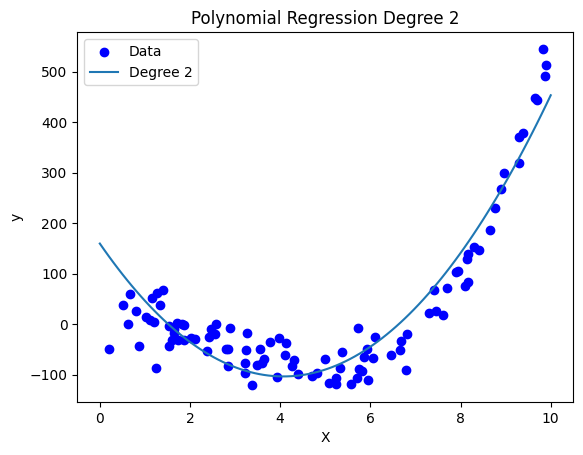

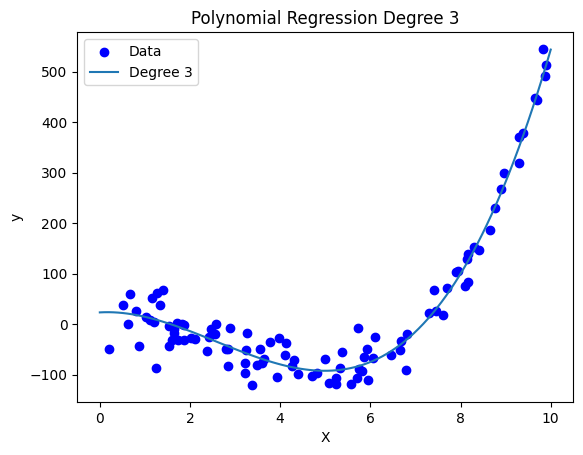

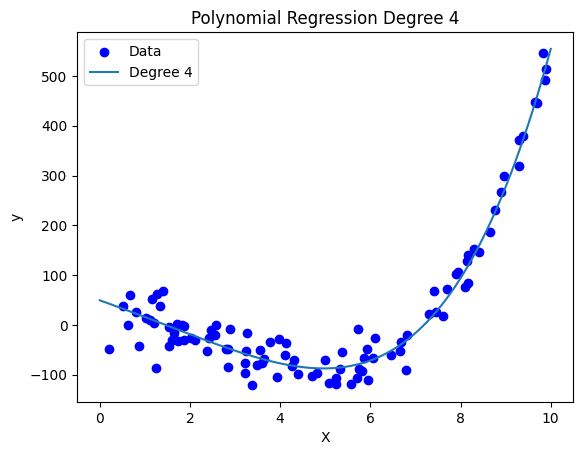

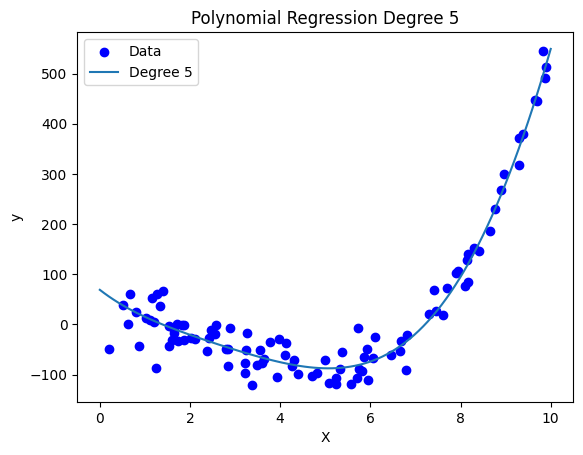

R² score for polynomial degree 1: 0.3998
R² score for polynomial degree 2: 0.8749
R² score for polynomial degree 3: 0.9607
R² score for polynomial degree 4: 0.9556
R² score for polynomial degree 5: 0.9514


In [28]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate a synthetic dataset
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2 * X**3 - 15 * X**2 + 5 * X + 7 + np.random.randn(100, 1) * 30  # Polynomial relationship with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a list to store R² scores for each degree
r2_scores = []

# Loop through polynomial degrees from 1 to 5
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit a linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_poly_test)

    # Calculate and store the R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Plot the polynomial fit for the current degree
    plt.scatter(X, y, color='blue', label='Data')
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_poly_range = poly.transform(X_range)
    y_range = model.predict(X_poly_range)
    plt.plot(X_range, y_range, label=f'Degree {degree}')
    plt.title(f"Polynomial Regression Degree {degree}")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Print the R² scores for each polynomial degree
for degree, r2 in zip(range(1, 6), r2_scores):
    print(f"R² score for polynomial degree {degree}: {r2:.4f}")
